In [14]:
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data_path = r"C:\Users\HP\Documents\GitHub\3D-3D_Image_Registration\SE000003"

# List all files in the directory
files = os.listdir(data_path)
print(files)


['CT000000', 'CT000001', 'CT000002', 'CT000003', 'CT000004', 'CT000005', 'CT000006', 'CT000007', 'CT000008', 'CT000009', 'CT000010', 'CT000011', 'CT000012', 'CT000013', 'CT000014', 'CT000015', 'CT000016', 'CT000017', 'CT000018', 'CT000019', 'CT000020', 'CT000021', 'CT000022', 'CT000023', 'CT000024', 'CT000025', 'CT000026', 'CT000027', 'CT000028', 'CT000029', 'CT000030', 'CT000031', 'CT000032', 'CT000033', 'CT000034', 'CT000035', 'CT000036', 'CT000037', 'CT000038', 'CT000039', 'CT000040', 'CT000041', 'CT000042', 'CT000043', 'CT000044', 'CT000045', 'CT000046', 'CT000047', 'CT000048', 'CT000049', 'CT000050', 'CT000051', 'CT000052', 'CT000053', 'CT000054', 'CT000055', 'CT000056', 'CT000057', 'CT000058', 'CT000059', 'CT000060', 'CT000061', 'CT000062', 'CT000063', 'CT000064', 'CT000065', 'CT000066', 'CT000067', 'CT000068', 'CT000069', 'CT000070', 'CT000071', 'CT000072', 'CT000073', 'CT000074', 'CT000075', 'CT000076', 'CT000077', 'CT000078', 'CT000079', 'CT000080', 'CT000081', 'CT000082', 'CT

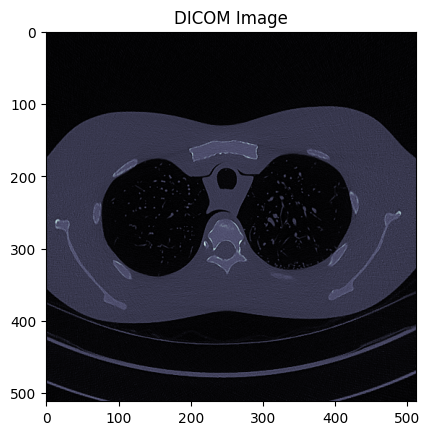

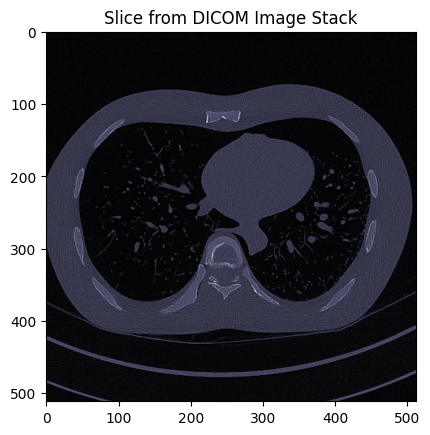

       PatientAge PatientSex  SliceThickness    PixelSpacing
count         426        426           426.0             426
unique          1          1             NaN               1
top          017Y          M             NaN  [0.625, 0.625]
freq          426        426             NaN             426
mean          NaN        NaN             1.0             NaN
std           NaN        NaN             0.0             NaN
min           NaN        NaN             1.0             NaN
25%           NaN        NaN             1.0             NaN
50%           NaN        NaN             1.0             NaN
75%           NaN        NaN             1.0             NaN
max           NaN        NaN             1.0             NaN
Pixel intensity mean: 489.09604081525487
Pixel intensity standard deviation: 485.43999076864577
Pixel intensity min: 0
Pixel intensity max: 4095


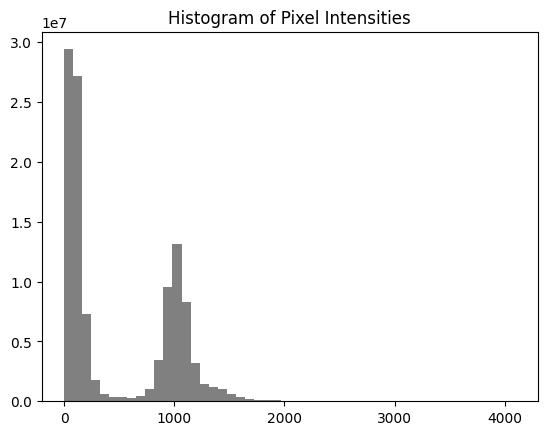

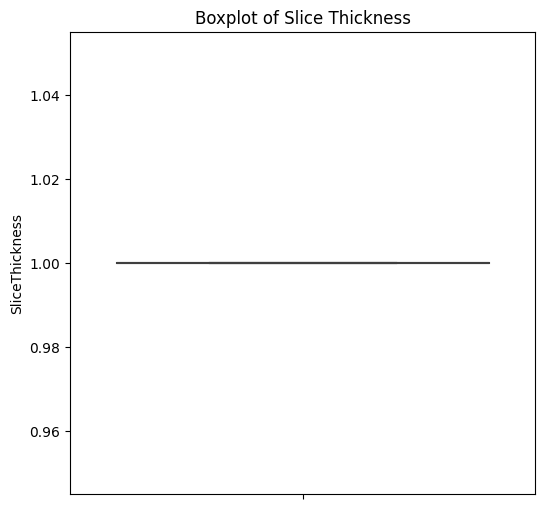

In [1]:

# Define path to data
data_path = r"C:\Users\HP\Documents\GitHub\3D-3D_Image_Registration\SE000003"

# Load DICOM files
def load_dicom_files(path):
    dicom_files = []
    for i in range(426):  # Adjust this based on the total files you have
        filename = f"CT{str(i).zfill(6)}"
        dicom_files.append(pydicom.dcmread(os.path.join(path, filename)))
    return dicom_files

dicom_files = load_dicom_files(data_path)

# Visualize a DICOM image
plt.imshow(dicom_files[0].pixel_array, cmap=plt.cm.bone)
plt.title("DICOM Image")
plt.show()

# Visualize a stack of DICOM images
# NOTE: You should adjust the following code based on the orientation of your images
image_stack = np.stack([file.pixel_array for file in dicom_files])
plt.imshow(image_stack[200], cmap=plt.cm.bone)  # Show a slice in the middle of the stack
plt.title("Slice from DICOM Image Stack")
plt.show()

# Analyze DICOM metadata
metadata = []
for dicom_file in dicom_files:
    metadata.append({
        "PatientAge": dicom_file.PatientAge,
        "PatientSex": dicom_file.PatientSex,
        "SliceThickness": dicom_file.SliceThickness,
        "PixelSpacing": dicom_file.PixelSpacing,
        # Add more fields as required
    })
metadata_df = pd.DataFrame(metadata)
print(metadata_df.describe(include="all"))  # Basic statistics of metadata

# Analyze image statistics
pixel_arrays = [file.pixel_array.ravel() for file in dicom_files]
pixels = np.concatenate(pixel_arrays)
print(f"Pixel intensity mean: {np.mean(pixels)}")
print(f"Pixel intensity standard deviation: {np.std(pixels)}")
print(f"Pixel intensity min: {np.min(pixels)}")
print(f"Pixel intensity max: {np.max(pixels)}")

# Histogram of pixel intensities
plt.hist(pixels, bins=50, color='gray')
plt.title("Histogram of Pixel Intensities")
plt.show()

# Visualizing Slice Thickness
# NOTE: This assumes that slice thickness is the same for all images
plt.figure(figsize=(6, 6))
sns.boxplot(y="SliceThickness", data=metadata_df)
plt.title("Boxplot of Slice Thickness")
plt.show()

# More analysis steps could be added as per your requirements


In [16]:
# Import necessary libraries
import os
import pydicom
import numpy as np
import torch
import torchvision
from torch import nn, optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# Define path to data
data_path = r"C:\Users\HP\Documents\GitHub\3D-3D_Image_Registration\SE000003"

# Read DICOM files
def read_dicom(path):
    dicom_images = []
    for i in range(426): # Adjust this number based on your total files
        file = f"CT{str(i).zfill(6)}"
        dicom_images.append(pydicom.dcmread(os.path.join(path, file)).pixel_array)
    return np.array(dicom_images)

# Preprocess DICOM images
def preprocess(dicom_images):
    # Convert to float32
    dicom_images = dicom_images.astype(np.float32)
    # TODO: implement other preprocessing steps
    # Normalize, resize, remove noise etc.
    return dicom_images


# Create a Dataset
class CTScanDataset(Dataset):
    def __init__(self, dicom_images, transform=None):
        self.dicom_images = dicom_images
        self.transform = transform

    def __len__(self):
        return len(self.dicom_images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        image = self.dicom_images[idx]
        if self.transform:
            image = self.transform(image)
        return image

# Create a simple U-Net model as a placeholder
# TODO: Replace this with a real U-Net implementation
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv3d(16, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return x

# Load DICOM images
dicom_images = read_dicom(data_path)
print(f"Loaded {len(dicom_images)} DICOM images.")

# Preprocess images
preprocessed_images = preprocess(dicom_images)

# Define transformations
transformations = transforms.Compose([
    transforms.ToTensor(),
])

# Create dataset
dataset = CTScanDataset(preprocessed_images, transform=transformations)
print(f"Created dataset with {len(dataset)} images.")

# Split dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)  # Batch size must be 1 for 3D images
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # Batch size must be 1 for 3D images

# Initialize model
model = UNet()
print(f"Model has {sum(p.numel() for p in model.parameters())} parameters.")

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(2):  # loop over the dataset multiple times
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs]
        inputs = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, inputs)  # Assuming we are doing image reconstruction
        loss.backward()
        optimizer.step()

print('Finished Training')


Loaded 426 DICOM images.
Created dataset with 426 images.
Model has 881 parameters.
Finished Training
